# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Netanel Musayev (5535)

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd

In [3]:
# Loading datasets

train_data = pd.read_csv('./datasets/titanic_train.csv')
test_data = pd.read_csv('./datasets/titanic_test.csv')

In [4]:
# Tests

print("Train Data:")
print(train_data.head())

print("\nTest Data:")
print(test_data.head())

Train Data:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
0       1    0  54.0      1      0  78.2667         1         1
1       2    0  45.0      0      0  13.5000         0         1
2       3    1  20.0      0      0   9.5000         0         0
3       3    1  36.0      0      0   7.8958         0         0
4       3    1  22.0      0      0   8.0500         0         0

Test Data:
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Statistics
print("Basic statistics:")
print(train_data.describe())

Basic statistics:
           Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    1.00000

In [7]:
# Number of passengers who survived
survival_count = train_data['Survived'].value_counts()
print("Passengers who survived:")
print(survival_count)

Passengers who survived:
Survived
0    431
1    281
Name: count, dtype: int64


C:\Users\netan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


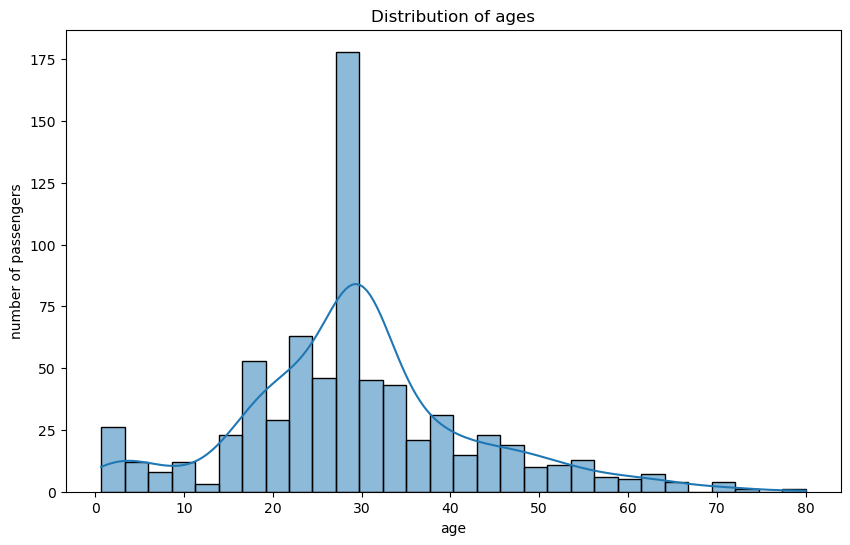

In [8]:
# Chart describes distribution of ages
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of ages')
plt.xlabel('age')
plt.ylabel('number of passengers')
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

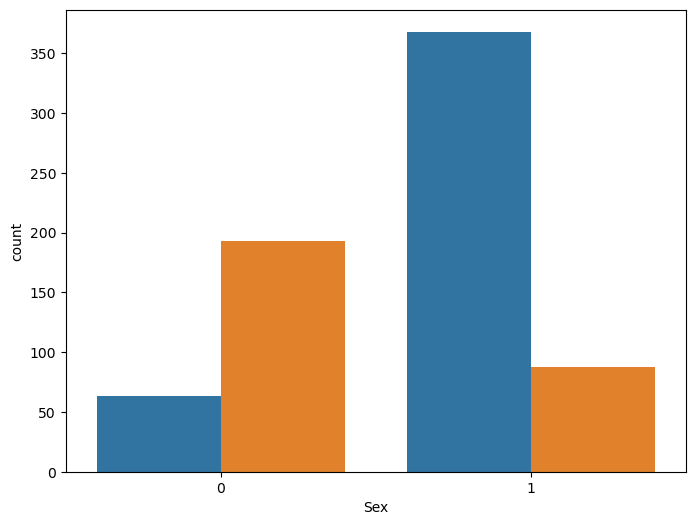

In [10]:
# Chart describes survival cout by gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train_data)
plt.title('survival count by gender')
plt.xlabel('gender')
plt.ylabel('number of passengers')
plt.legend(title='Survived', loc='upper right', labels=['not survived', 'survived'])
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

## Part 5 - Apply on test and show model performance estimation